# LeNet5 on MNIST
In this lab we will train a LeNet5 model on the MNIST dataset

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import time

It is recommended to use the GPU for this exercise

In [2]:

use_cuda = True

if use_cuda and torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

device

device(type='cuda')

Define a function to show images

In [3]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Function to show an image tensor
def show(X):
    if X.dim() == 3 and X.size(2) == 3:
        plt.imshow(X.numpy())
        plt.show()
    elif X.dim() == 2:
        plt.imshow(   X.numpy() , cmap='gray'  )
        plt.show()
    else:
        print('WRONG TENSOR SIZE')

### Load the MNIST dataset

In [5]:
import torchvision.datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),  # Normalize the dataset by subtracting the mean (0.1307) and dividing by the std (0.3081)
                                ])

trainset = torchvision.datasets.MNIST(root='./data_mnist',
                                      train=True,
                                      download=True,
                                      transform=transform
                                      )

testset = torchvision.datasets.MNIST(root='./data_mnist',
                                     train=False,
                                     download=True,
                                     transform=transform
                                     )

batch_size = 128

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          )

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         )


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data_mnist\MNIST\raw\train-images-idx3-ubyte.gz to ./data_mnist\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data_mnist\MNIST\raw\train-labels-idx1-ubyte.gz to ./data_mnist\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data_mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data_mnist\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data_mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data_mnist\MNIST\raw



### Define the LeNet5 architecture

In [11]:
class LeNet5_convnet(nn.Module):

    def __init__(self):

        super(LeNet5_convnet, self).__init__()

        # CL1:   28 x 28  -->    50 x 28 x 28 
        self.conv1 = nn.Conv2d(1,   50,  kernel_size=3,  padding=1 )
        
        # MP1: 50 x 28 x 28 -->    50 x 14 x 14
        self.pool1  = nn.MaxPool2d(2,2)
        
        # CL2:   50 x 14 x 14  -->    100 x 14 x 14 
        self.conv2 = nn.Conv2d(50,  100,  kernel_size=3,  padding=1 )
        
        # MP2: 100 x 14 x 14 -->    100 x 7 x 7
        self.pool2 = nn.MaxPool2d(2,2)
        
        # LL1:   100 x 7 x 7 = 4900 -->  100 
        self.linear1 = nn.Linear(4900, 100)
        
        # LL2:   4900  -->  10 
        self.linear2 = nn.Linear(100,10)


    def forward(self, x):

        # CL1:   28 x 28  -->    50 x 28 x 28 
        x = self.conv1(x)
        x = F.relu(x)
        
        # MP1: 50 x 28 x 28 -->    50 x 14 x 14
        x = self.pool1(x)
        
        # CL2:   50 x 14 x 14  -->    100 x 14 x 14
        x = self.conv2(x)
        x = F.relu(x)
        
        # MP2: 100 x 14 x 14 -->    100 x 7 x 7
        x = self.pool2(x)

        # LL1:   100 x 7 x 7 = 4900  -->  100 
        x = x.view(-1, 4900)
        x = self.linear1(x)
        x = F.relu(x)
        
        # LL2:   4900  -->  10 
        x = self.linear2(x)
    
        return x

In [12]:
# Build the network and move its parameters to either GPU or CPU
net = LeNet5_convnet().to(device)

### Choose a loss function and learning rate

In [13]:
criterion = nn.CrossEntropyLoss()

my_lr = 0.01


### Train the model on the train set

In [14]:
start=time.time()

optimizer=torch.optim.SGD(net.parameters(), lr=my_lr)

for epoch in range(1,10):

    for i, (x_batch, y_batch) in enumerate(trainloader):
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)  # Move the data to the device that is used

        optimizer.zero_grad()  # Set all currenly stored gradients to zero 

        y_pred = net(x_batch)

        loss = criterion(y_pred, y_batch)

        loss.backward()

        optimizer.step()

        # Compute relevant metrics

        y_pred_max = torch.argmax(y_pred, dim=1)  # Get the labels with highest output probability

        correct = torch.sum(torch.eq(y_pred_max, y_batch)).item()  # Count how many are equal to the true labels

        elapsed = time.time() - start  # Keep track of how much time has elapsed

        # Show progress every 20 batches 
        if not i % 20:
            print(f'epoch: {epoch}, time: {elapsed:.3f}s, loss: {loss.item():.3f}, train accuracy: {correct / batch_size:.3f}')

epoch: 1, time: 0.584s, loss: 2.290, train accuracy: 0.070
epoch: 1, time: 1.325s, loss: 2.088, train accuracy: 0.508
epoch: 1, time: 1.839s, loss: 1.737, train accuracy: 0.773
epoch: 1, time: 2.217s, loss: 1.172, train accuracy: 0.828
epoch: 1, time: 2.598s, loss: 0.791, train accuracy: 0.844
epoch: 1, time: 2.995s, loss: 0.624, train accuracy: 0.828
epoch: 1, time: 3.432s, loss: 0.597, train accuracy: 0.828
epoch: 1, time: 3.831s, loss: 0.479, train accuracy: 0.844
epoch: 1, time: 4.239s, loss: 0.449, train accuracy: 0.859
epoch: 1, time: 4.657s, loss: 0.434, train accuracy: 0.891
epoch: 1, time: 5.073s, loss: 0.322, train accuracy: 0.922
epoch: 1, time: 5.499s, loss: 0.347, train accuracy: 0.922
epoch: 1, time: 5.933s, loss: 0.282, train accuracy: 0.945
epoch: 1, time: 6.410s, loss: 0.334, train accuracy: 0.914
epoch: 1, time: 6.855s, loss: 0.512, train accuracy: 0.828
epoch: 1, time: 7.308s, loss: 0.312, train accuracy: 0.898
epoch: 1, time: 7.808s, loss: 0.377, train accuracy: 0.9

### Evaluate the model on the test set

In [15]:
correct_total = 0

for i, (x_batch, y_batch) in enumerate(testloader):
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)  # Move the data to the device that is used

    y_pred = net(x_batch)
    y_pred_max = torch.argmax(y_pred, dim=1)

    correct_total += torch.sum(torch.eq(y_pred_max, y_batch)).item()

print(f'Accuracy on the test set: {correct_total / len(testset):.3f}')

Accuracy on the test set: 0.983


### Show the model's prediction for a random sample from the test set

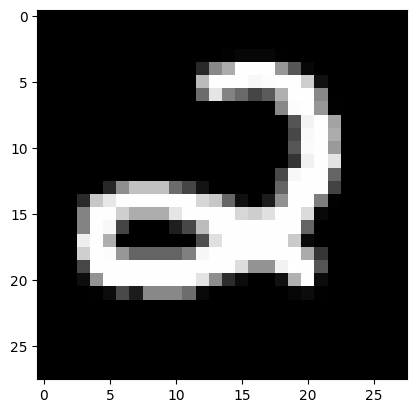

Confidence scores:
0: 9.782681900105672e-07
1: 3.9823358499724293e-10
2: 0.999976634979248
3: 3.9921469578985125e-06
4: 2.702623305594898e-06
5: 6.9481491671297135e-09
6: 2.2382788955610522e-08
7: 4.311555112934684e-09
8: 1.5646426618332043e-05
9: 5.814696635297878e-08

Label with highest confidence score: 2


In [26]:
# choose a picture at random
im_minibatch, label_minibatch = next(iter(testloader))
im, label = im_minibatch[0].cpu(), label_minibatch[0].cpu()

# diplay the picture
show(im.squeeze())

# feed it to the net and display the confidence scores
prob = F.softmax(net.cpu()(im.unsqueeze(0)), dim=1)

print('Confidence scores:\n' + '\n'.join(['{}: {}'.format(i, p.item()) for i, p in enumerate(prob.squeeze())]))

print('\nLabel with highest confidence score: {}'.format(torch.argmax(prob).item()))